# Historical Analysis of Summer Olympics Medals

#### Dataset - https://www.kaggle.com/datasets/divyansh22/summer-olympics-medals

In [1]:
# importing essential libraries and tools.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#read data from csv file.
olympic_data = pd.read_csv('Summer-Olympic-medals-1976-to-2008.csv', encoding='latin-1')
olympic_data.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [3]:
# total number of rows and columns in dataset.
olympic_data.shape

(15433, 11)

In [4]:
# columns names in our dataset.
olympic_data.columns

Index(['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender',
       'Country_Code', 'Country', 'Event_gender', 'Medal'],
      dtype='object')

In [5]:
# some basic information about the dataset like datatypes, if the column is null and more.
olympic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


************
##### First task is to clean the dataset by handling missing values, incorrect entries and also ensure data is correctly formatted.
************

In [6]:
# isnull() function is used to see the null values in our dataset and then count() is counting the null values 
# from each column.
olympic_data.isnull().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

In [7]:
# drop all rows where null values are there using dropna() function.
clean_data1 = olympic_data.dropna()
clean_data1.shape

(15316, 11)

In [8]:
# Again checked if there is null values in the dataset.
clean_data1.isnull().sum()

City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64

In [9]:
# describe() function shows every numerical column statistical characteristics.
clean_data1.describe()

,Year
count,15316.000000
mean,1993.620789
std,10.159851
min,1976.000000
25%,1984.000000
50%,1996.000000
75%,2004.000000
max,2008.000000


In [10]:
# dtypes shows the data types of each column.
clean_data1.dtypes

City             object
Year            float64
Sport            object
Discipline       object
Event            object
Athlete          object
Gender           object
Country_Code     object
Country          object
Event_gender     object
Medal            object
dtype: object

In [11]:
# unique() function shows the unique values from a specified column.
clean_data1.City.unique()

array(['Montreal', 'Moscow', 'Los Angeles', 'Seoul', 'Barcelona',
       'Atlanta', 'Sydney', 'Athens', 'Beijing'], dtype=object)

In [12]:
clean_data1.Medal.unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

In [13]:
# duplicated() function returns boolean series denoting duplicate rows.
clean_data1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15428    False
15429    False
15430    False
15431    False
15432    False
Length: 15316, dtype: bool

In [14]:
# converting year column from an object format to datetime format which is useful for timebased operations and analysis.
copy_olympic_data = clean_data1.copy()
copy_olympic_data.loc[:, 'Year'] = pd.to_datetime(clean_data1['Year'], format='%Y')
copy_olympic_data.dtypes

City                    object
Year            datetime64[ns]
Sport                   object
Discipline              object
Event                   object
Athlete                 object
Gender                  object
Country_Code            object
Country                 object
Event_gender            object
Medal                   object
dtype: object

In [15]:
# converted Medal column to category type 
copy_olympic_data['Medal'] = pd.Categorical(copy_olympic_data['Medal'], categories=["Gold", "Silver", "Bronze"], ordered=True)
copy_olympic_data.dtypes

City                    object
Year            datetime64[ns]
Sport                   object
Discipline              object
Event                   object
Athlete                 object
Gender                  object
Country_Code            object
Country                 object
Event_gender            object
Medal                 category
dtype: object

*****
##### Next task is perform exploratory data analysis to understand the distribution of medals, number of participating nations, and other key metrics and visualize overall trends in data.
*****

In [16]:
copy_olympic_data

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976-01-01,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976-01-01,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976-01-01,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976-01-01,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976-01-01,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008-01-01,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008-01-01,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008-01-01,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008-01-01,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold


In [18]:
# Total number of distribution of medals.
distribution_of_medals = copy_olympic_data['Medal'].value_counts()
distribution_of_medals

Bronze    5258
Gold      5042
Silver    5016
Name: Medal, dtype: int64

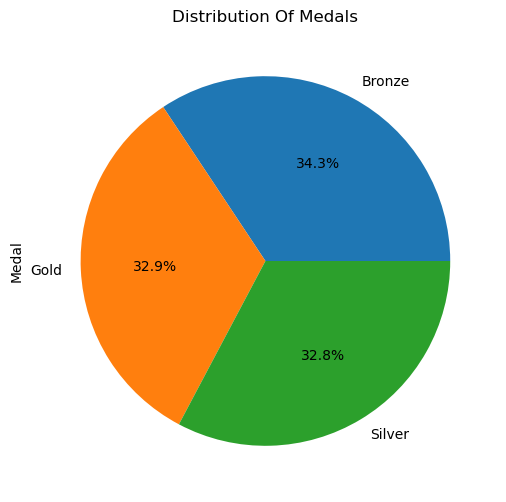

In [19]:
# Distribution of medals using a pie chart
plt.figure(figsize=(10,6))
distribution_of_medals.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution Of Medals')
# plt.xlabel('Medal')
plt.show()

In [20]:
# Number of participating nations.
total_participating_countries = copy_olympic_data['Country'].nunique()
total_participating_countries

127

In [106]:
# Number of unique events in olympics.
total_events = copy_olympic_data['Event'].nunique()
total_events

293

In [107]:
# Number of Unique athletes.
total_athletes = copy_olympic_data['Athlete'].nunique()
total_athletes

11337

In [112]:
# Total medals won by each country.
medals_by_country = copy_olympic_data.groupby('Country').Medal.count().reset_index()
medals_by_country

,Country,Medal
0,Afghanistan,1
1,Algeria,14
2,Argentina,153
3,Armenia,9
4,Australia,798
...,...,...
122,Virgin Islands*,1
123,West Germany,345
124,Yugoslavia,278
125,Zambia,2


In [114]:
# Extracted top5 countries from numbers of medals each country have won.
top5_countries = medals_by_country.sort_values(by='Medal', ascending=False).head(5)
top5_countries

,Country,Medal
117,United States,1992
95,Soviet Union,1021
4,Australia,798
38,Germany,691
18,China,679


In [109]:
# Total medals won over the years.
total_medals_by_year = copy_olympic_data.groupby(copy_olympic_data['Year'].dt.year)['Medal'].count()
total_medals_by_year

Year
1976    1305
1980    1387
1984    1459
1988    1546
1992    1705
1996    1859
2000    2015
2004    1998
2008    2042
Name: Medal, dtype: int64

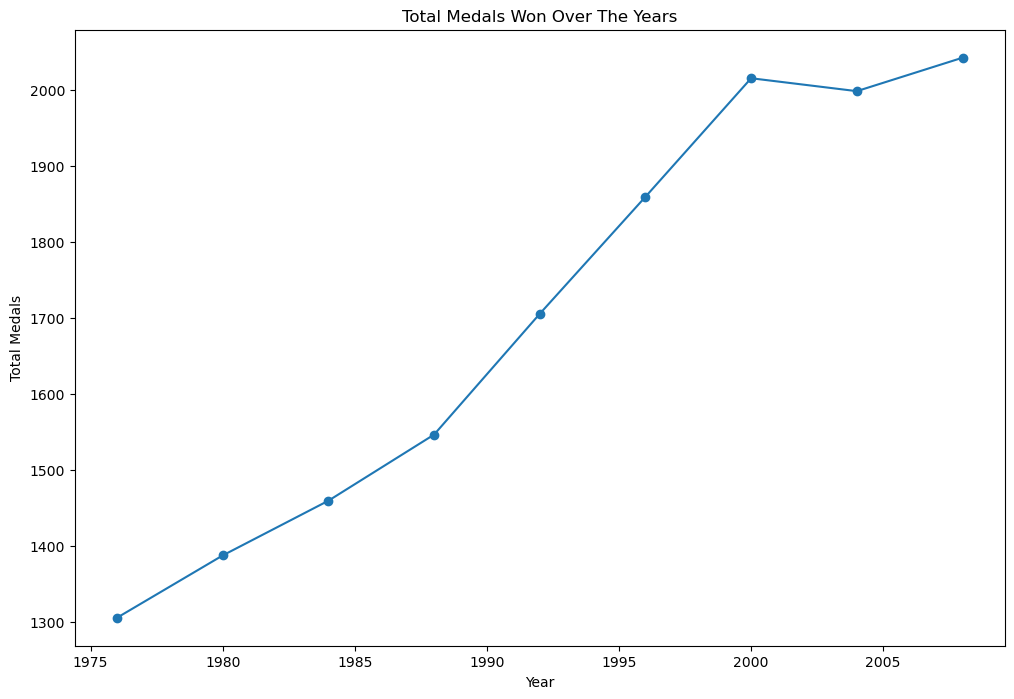

In [110]:
# Visualize total medals won over the years.
plt.figure(figsize=(12,8))
total_medals_by_year.plot(kind='line', marker='o')
plt.title('Total Medals Won Over The Years')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.show()

*****
##### Next task is to analyze the performance of countries over the years in terms of medals won and identify the most successful countries in the Olympics
*****

In [45]:
# performace of countries over the years in terms of medals won.
medalsby_country_year = copy_olympic_data.groupby(['Country', copy_olympic_data['Year'].dt.year]).Medal.count().reset_index()
medalsby_country_year

,Country,Year,Medal
0,Afghanistan,2008,1
1,Algeria,1984,2
2,Algeria,1992,2
3,Algeria,1996,3
4,Algeria,2000,5
...,...,...,...
554,Zambia,1984,1
555,Zambia,1996,1
556,Zimbabwe,1980,16
557,Zimbabwe,2004,3


In [50]:
# If i want to see particular country medals.
country = 'Zimbabwe'
country_medals = medalsby_country_year[medalsby_country_year['Country']=='Zimbabwe']
country_medals

,Country,Year,Medal
556,Zimbabwe,1980,16
557,Zimbabwe,2004,3
558,Zimbabwe,2008,4


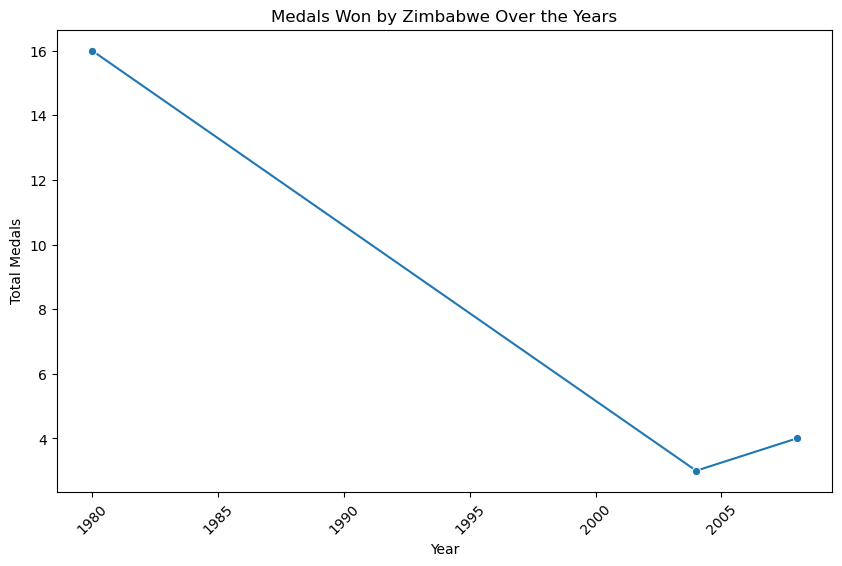

In [51]:
#  Plotted the medals won by the selected country over the years.
plt.figure(figsize=(10, 6))
sns.lineplot(data=country_medals, x='Year', y='Medal', marker='o')
plt.title(f'Medals Won by {country} Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
# plt.grid(True)
plt.show()

In [39]:
# top performing countries bases on total medals count.
country_total_medals = copy_olympic_data.groupby('Country').Medal.count().sort_values(ascending=False)
country_total_medals

Country
United States    1992
Soviet Union     1021
Australia         798
Germany           691
China             679
                 ... 
Panama              1
Senegal             1
Sri Lanka           1
Sudan               1
Macedonia           1
Name: Medal, Length: 127, dtype: int64

In [41]:
# Extracted top5 countries from numbers of medals each country have won.
top5_countries = medals_by_country.sort_values(ascending=False).head(5)
top5_countries

Country
United States    1992
Soviet Union     1021
Australia         798
Germany           691
China             679
Name: Medal, dtype: int64

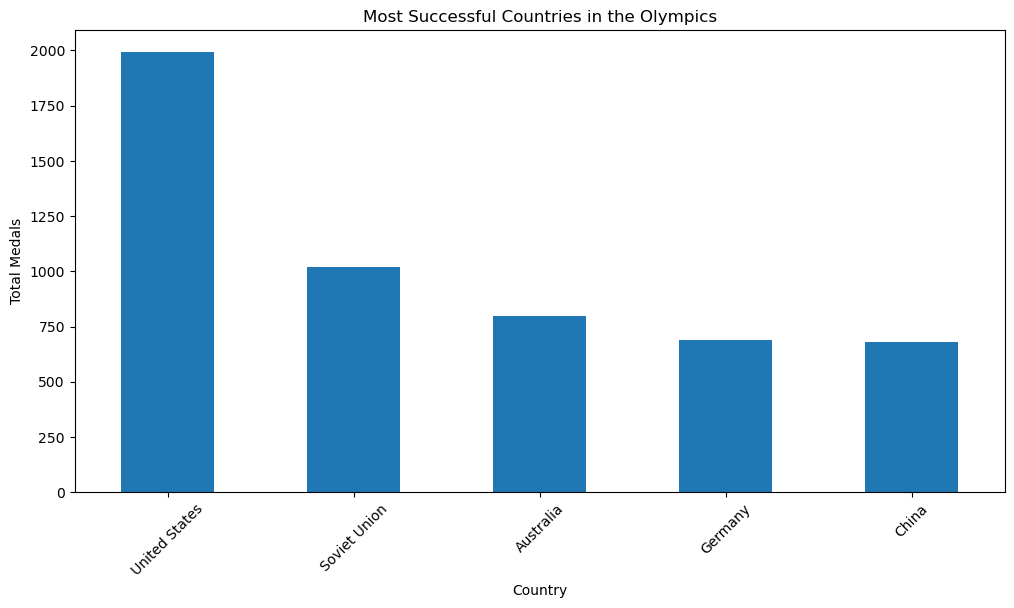

In [43]:
plt.figure(figsize=(12, 6))
top5_countries.plot(kind='bar')
plt.title('Most Successful Countries in the Olympics')
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.show()

*****
##### Next task is analyze athelete performance including their achievements, identifying standout performers and analyze the performance based on athlete demographics like gender .
*****

In [104]:
copy_olympic_data

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976-01-01,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976-01-01,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976-01-01,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976-01-01,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976-01-01,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008-01-01,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008-01-01,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008-01-01,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008-01-01,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold


In [54]:
# Achievements of athletes: counted medals for each athlete.
athelete_medals = copy_olympic_data.groupby('Athlete')['Medal'].count().reset_index().sort_values(by='Medal', ascending=False)
athelete_medals

,Athlete,Medal
7752,"PHELPS, Michael",16
2776,"FISCHER, Birgit",12
7051,"NEMOV, Alexei",12
10019,"TORRES, Dara",12
9884,"THOMPSON, Jenny",12
...,...,...
4261,"JAANSON, Jueri",1
4262,"JAANSON, Juri",1
4263,"JABLKOWSKI, Piotr",1
4264,"JABRAILOV, Elmadi",1


In [58]:
# Identified standout performers(i.e. top 5 athletes with the most medals)
standout_performers = athelete_medals.head(5)
standout_performers

,Athlete,Medal
7752,"PHELPS, Michael",16
2776,"FISCHER, Birgit",12
7051,"NEMOV, Alexei",12
10019,"TORRES, Dara",12
9884,"THOMPSON, Jenny",12


<Figure size 1200x600 with 0 Axes>

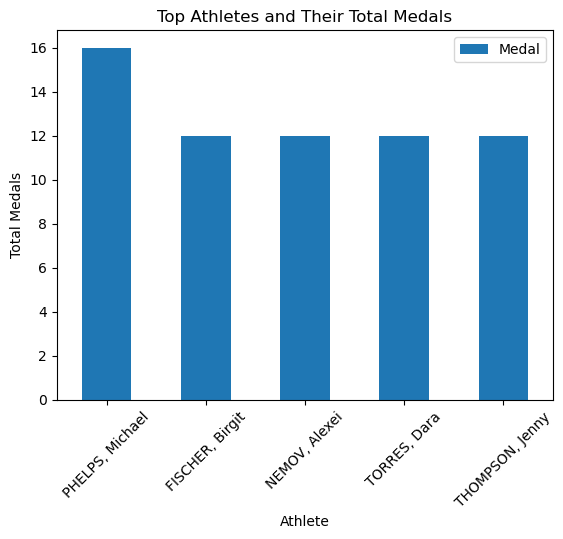

In [61]:
#  Plotted the top athletes and their medal hauls using pandas plot.
plt.figure(figsize=(12,6))
standout_performers.plot(kind='bar', x='Athlete', y='Medal')
plt.title('Top Athletes and Their Total Medals')
plt.xlabel('Athlete')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.show()

In [63]:
# Analyzed performance based on athlete demographics: Gender.
gender_medals_count = copy_olympic_data.groupby('Gender')['Medal'].count().reset_index()
gender_medals_count

,Gender,Medal
0,Men,9388
1,Women,5928


<Figure size 1200x600 with 0 Axes>

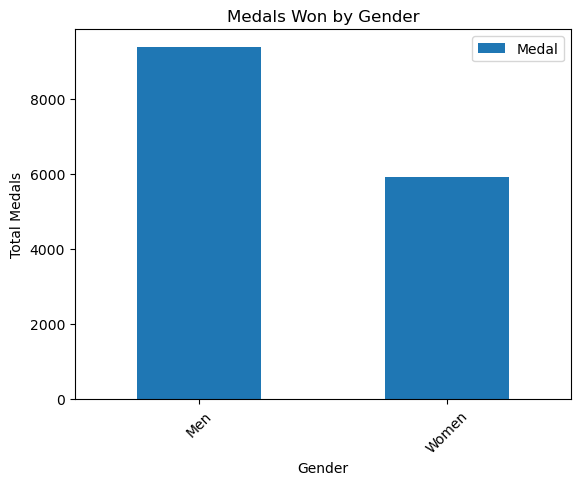

In [66]:
# Plotted medals won by gender.
plt.figure(figsize=(12,6))
gender_medals_count.plot(kind='bar', x='Gender', y='Medal')
plt.title('Medals Won by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.show()

*****
##### Next taks is to identify trends and dominant nations in each sport/event.
*****

In [67]:
copy_olympic_data

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976-01-01,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976-01-01,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976-01-01,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976-01-01,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976-01-01,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008-01-01,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008-01-01,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008-01-01,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008-01-01,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold


In [100]:
# Group by sport, event, and country to count the total medals.
medalsby_sport_event = copy_olympic_data.groupby(['Sport', 'Event', 'Country'])['Medal'].count().reset_index()
medalsby_sport_event

,Sport,Event,Country,Medal
0,Aquatics,100m backstroke,Australia,2
1,Aquatics,100m backstroke,Austria,1
2,Aquatics,100m backstroke,Canada,3
3,Aquatics,100m backstroke,Cuba,2
4,Aquatics,100m backstroke,East Germany,8
...,...,...,...,...
3338,Wrestling,97 - 130kg,Belarus,1
3339,Wrestling,97 - 130kg,Cuba,1
3340,Wrestling,97 - 130kg,Russia,2
3341,Wrestling,97 - 130kg,United States,1


In [101]:
# Filter by a specific event
medalsby_sport_event[medalsby_sport_event['Event']=='10m platform']

,Sport,Event,Country,Medal
68,Aquatics,10m platform,Australia,4
69,Aquatics,10m platform,Canada,2
70,Aquatics,10m platform,China,18
71,Aquatics,10m platform,East Germany,2
72,Aquatics,10m platform,Germany,2
73,Aquatics,10m platform,Italy,1
74,Aquatics,10m platform,Mexico,1
75,Aquatics,10m platform,Russia,3
76,Aquatics,10m platform,Soviet Union,6
77,Aquatics,10m platform,Sweden,1


In [103]:
# Identified dominant nations in each sport, discipline and event.
dominant_nations = medalsby_sport_event.sort_values(by='Medal', ascending=False).groupby(['Sport', 'Event']).head(1)
dominant_nations

,Sport,Event,Country,Medal
859,Basketball,basketball,United States,192
1799,Hockey,hockey,Netherlands,159
840,Baseball,baseball,Cuba,111
1608,Football,football,Brazil,109
250,Aquatics,4x100m medley relay,United States,106
...,...,...,...,...
2336,Sailing,RS:X - Windsurfer,United Kingdom,1
2330,Sailing,Laser Radial - One Person Dinghy,United States,1
2009,Judo,70 - 80kg (middleweight),Yugoslavia,1
2044,Judo,80 - 93kg (half-heavyweight),Japan,1


In [104]:
# top dominant nations.
dom_nationsby_sportevent = dominant_nations.head()

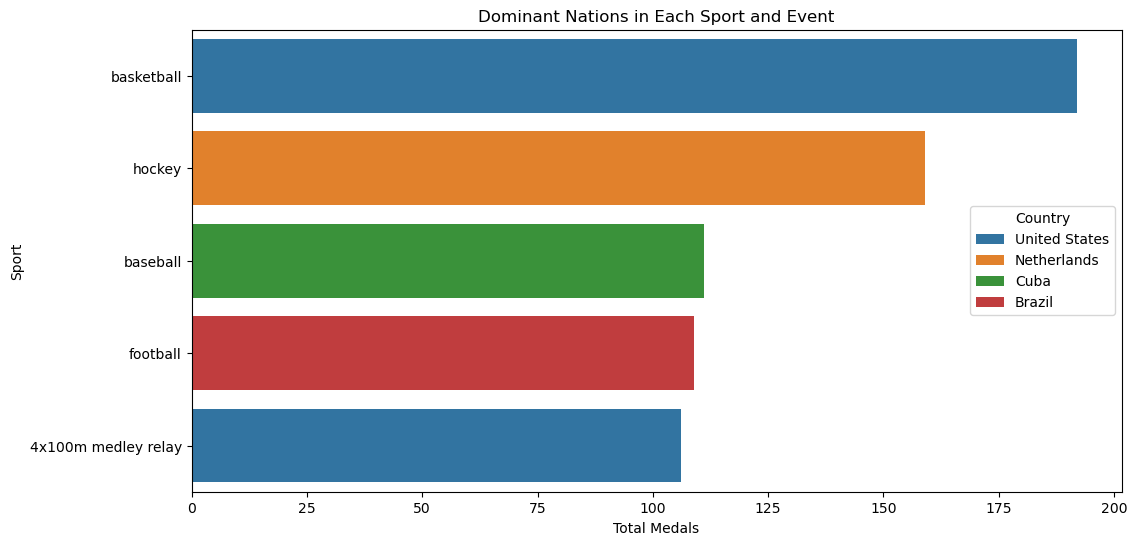

In [105]:
# Plotted the dominant nations and thier domination in specific sports.
plt.figure(figsize=(12,6))
sns.barplot(data=dom_nationsby_sportevent, x='Medal', y='Event', hue='Country', dodge=False)
plt.title('Dominant Nations in Each Sport and Event')
plt.xlabel('Total Medals')
plt.ylabel('Sport')
plt.show()